In [10]:
import pandas as pd 

In [11]:
tracks_df = pd.read_json("tracks.json")
tracks_df.head()


,id,id_artist,title,featured_artists,primary_artist,language,album,swear_IT,swear_EN,swear_IT_words,...,album_release_date,album_type,disc_number,track_number,duration_ms,explicit,popularity,id_album,lyrics,streams@1month
0,TR934808,ART04205421,​polka 2 :-/,"Ernia, Guè",Rosa Chemical,pl,FOREVER AND EVER,13,6,"['cazzo', 'cesso', 'coglioni', 'figa', 'merda'...",...,2021-04-09,album,1.0,3.0,207761.0,1.0,46.0,ALB115557,"Oplà, ah\nBdope, chiama due b—\n\nMi candidere...",186522
1,TR760029,ART04205421,POLKA,Thelonious B.,Rosa Chemical,en,FOREVER AND EVER,9,12,"['cazzo', 'culo', 'frocio', 'puttana', 'sega',...",...,2021-04-09,album,1.0,3.0,207761.0,1.0,46.0,ALB115557,"Greg Willen, non dormire\n(Brr-poh)\n\nT-T-Tro...",194313
2,TR916821,ART04205421,​britney ;-),"MamboLosco, RADICAL",Rosa Chemical,en,FOREVER AND EVER,16,12,"['bastardo', 'cazzo', 'culo', 'merda', 'troia']",...,2021-04-09,album,1.0,1.0,193544.0,1.0,39.0,ALB115557,"Mothz\nYeah, yeah, yeah-yeah\nBdope, chiama du...",63750
3,TR480968,ART04205421,CEO,Taxi B,Rosa Chemical,it,OKAY OKAY !! - EP,8,3,"['cazzo', 'culo', 'fottere', 'merda', 'pompino...",...,2025-05-16,single,1.0,2.0,169000.0,1.0,47.0,ALB730959,Designer sui vestiti penso di essere un outlet...,41473
4,TR585039,ART04205421,LONDRA,Rkomi,Rosa Chemical,en,FOREVER AND EVER,1,0,['cazzo'],...,2020-05-28,album,1.0,8.0,194779.0,1.0,41.0,ALB436151,"Bdope (Yeah)\n\nVuole solo me, non fare la gel...",30553


In [12]:
artists_df = pd.read_xml("artists.xml")
artists_df.head()


,id_author,name,gender,birth_date,birth_place,nationality,description,active_start,active_end,province,region,country,latitude,longitude
0,ART82291002,99 posse,M,None,None,None,gruppo musicale italiano,1991-01-01,NaN,None,None,None,NaN,NaN
1,ART53496045,achille lauro,M,1990-07-11,Verona,Italia,cantautore e rapper italiano (1990-),2012-01-01,NaN,Verona,Veneto,Italia,45.442498,10.985738
2,ART18853907,alfa,M,None,None,None,None,None,NaN,None,None,None,NaN,NaN
3,ART64265460,anna pepe,F,None,None,None,None,None,NaN,None,None,None,NaN,NaN
4,ART75741740,articolo 31,M,None,None,None,gruppo musicale hip hop italiano,1990-01-01,NaN,None,None,None,NaN,NaN


In [13]:
print("Tracks:", tracks_df.shape)
print("Artists:", artists_df.shape)


Tracks: (11166, 37)
Artists: (104, 14)


coordinate spaziali

In [14]:
!pip install geohash2


In [16]:
artists = artists_df.copy()


In [17]:
import geohash2
import pandas as pd

def compute_geohash(row, precision):
    lat = row["latitude"]
    lon = row["longitude"]
    if pd.isna(lat) or pd.isna(lon):
        return None
    return geohash2.encode(lat, lon, precision)

artists["geohash_6"] = artists.apply(lambda r: compute_geohash(r, 6), axis=1)
artists["geohash_5"] = artists.apply(lambda r: compute_geohash(r, 5), axis=1)
artists["geohash_3"] = artists.apply(lambda r: compute_geohash(r, 3), axis=1)

artists.head()

,id_author,name,gender,birth_date,birth_place,nationality,description,active_start,active_end,province,region,country,latitude,longitude,geohash_6,geohash_5,geohash_3
0,ART82291002,99 posse,M,None,None,None,gruppo musicale italiano,1991-01-01,NaN,None,None,None,NaN,NaN,None,None,None
1,ART53496045,achille lauro,M,1990-07-11,Verona,Italia,cantautore e rapper italiano (1990-),2012-01-01,NaN,Verona,Veneto,Italia,45.442498,10.985738,u0pf9b,u0pf9,u0p
2,ART18853907,alfa,M,None,None,None,None,None,NaN,None,None,None,NaN,NaN,None,None,None
3,ART64265460,anna pepe,F,None,None,None,None,None,NaN,None,None,None,NaN,NaN,None,None,None
4,ART75741740,articolo 31,M,None,None,None,gruppo musicale hip hop italiano,1990-01-01,NaN,None,None,None,NaN,NaN,None,None,None


In [18]:
# top geohash5 (zona cittadina)
top_zones_5 = (
    artists[artists["geohash_5"].notna()]
    .groupby("geohash_5")
    .size()
    .reset_index(name="n_artists")
    .sort_values("n_artists", ascending=False)
)

top_zones_5.head(10)


,geohash_5,n_artists
29,u0nd9,15
8,sr2yk,7
23,u0j2q,5
35,u205e,3
1,spqbb,3
12,sr60k,3
11,sr4vu,2
14,sr6c0,2
3,spyke,2
18,src2s,2


In [19]:
# top geohash 3 (macro area geografica)
top_zones_3 = (
    artists[artists["geohash_3"].notna()]
    .groupby("geohash_3")
    .size()
    .reset_index(name="n_artists")
    .sort_values("n_artists", ascending=False)
)

top_zones_3
top_zones_3.head(10)

,geohash_3,n_artists
14,u0n,22
6,sr2,8
13,u0j,7
8,sr6,6
16,u20,5
7,sr4,4
1,spq,3
2,spy,3
15,u0p,3
10,srb,2


In [22]:
#tabella della distribuzione geografica geohash6 
distribution_6 = (
    artists[artists["geohash_6"].notna()]
    .groupby("geohash_6")
    .size()
    .reset_index(name="n_artists")
)

distribution_6.head()


,geohash_6,n_artists
0,snyrp7,1
1,spqbb1,3
2,spygst,1
3,spykek,1
4,spyken,1


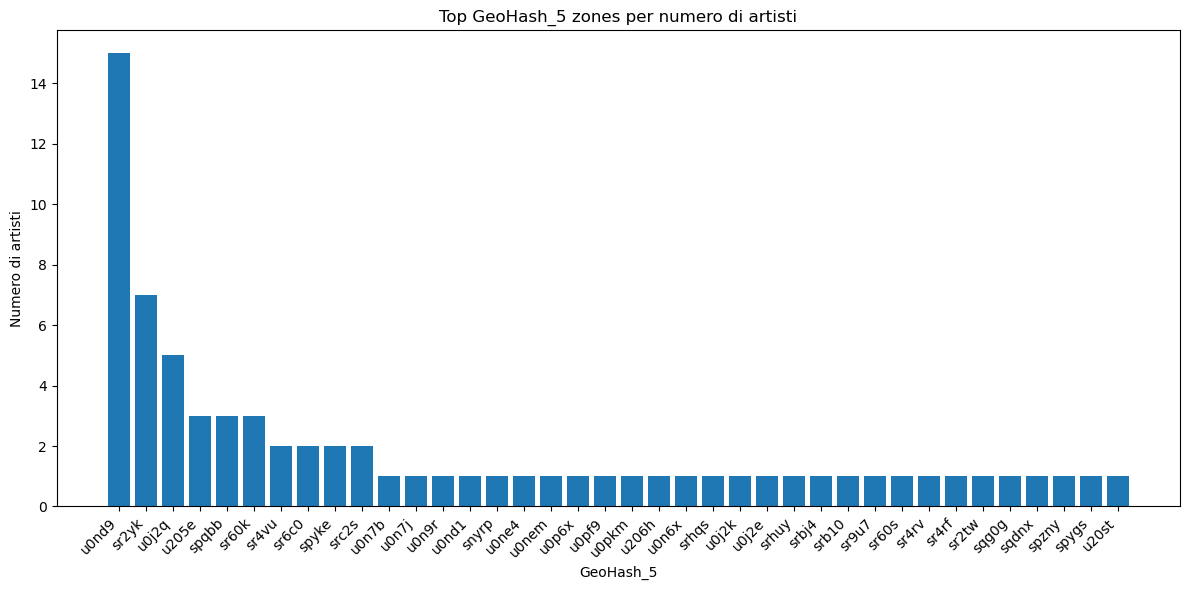

([0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16],
 [Text(0, 0, 'u0n'),
  Text(1, 0, 'sr2'),
  Text(2, 0, 'u0j'),
  Text(3, 0, 'sr6'),
  Text(4, 0, 'u20'),
  Text(5, 0, 'sr4'),
  Text(6, 0, 'spq'),
  Text(7, 0, 'spy'),
  Text(8, 0, 'u0p'),
  Text(9, 0, 'srb'),
  Text(10, 0, 'src'),
  Text(11, 0, 'srh'),
  Text(12, 0, 'sqg'),
  Text(13, 0, 'sqd'),
  Text(14, 0, 'sr9'),
  Text(15, 0, 'spz'),
  Text(16, 0, 'sny')])

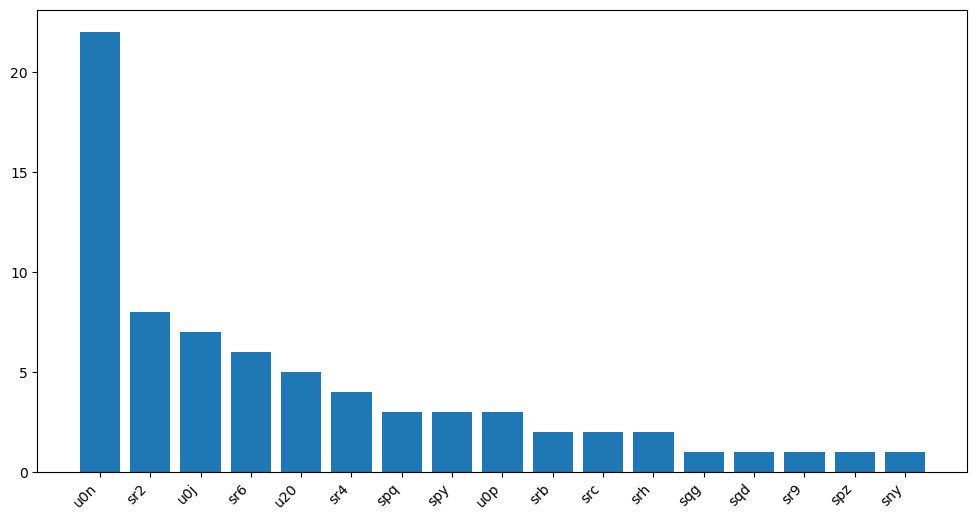

In [24]:
import matplotlib.pyplot as plt

plt.figure(figsize=(12,6))
plt.bar(top_zones_5["geohash_5"], top_zones_5["n_artists"])
plt.xticks(rotation=45, ha='right')
plt.title("Top GeoHash_5 zones per numero di artisti")
plt.xlabel("GeoHash_5")
plt.ylabel("Numero di artisti")
plt.tight_layout()
plt.show()
plt.figure(figsize=(12,6))
plt.bar(top_zones_3["geohash_3"], top_zones_3["n_artists"])
plt.xticks(rotation=45, ha='right')

In [27]:
#decodifica da geohash a lat/lon e stima area/città
!pip install geopy
import geohash2
import pandas as pd
from geopy.geocoders import Nominatim
from geopy.extra.rate_limiter import RateLimiter

# 1. Prendo solo le top zone (già calcolate)
top5 = top_zones_5.copy()

# 2. Decodifico geohash → lat/lon
top5["lat"], top5["lon"] = zip(*top5["geohash_5"].apply(lambda g: geohash2.decode(g)))

# 3. Apro geolocator per convertire lat/lon → città
geolocator = Nominatim(user_agent="geoartists")
reverse = RateLimiter(geolocator.reverse, min_delay_seconds=1)

def get_area(lat, lon):
    try:
        location = reverse((lat, lon), language="en")
        return location.address.split(",")[0]  # nome area/città
    except:
        return "Unknown"

# 4. Aggiungo una colonna con area stimata
top5["area_stimata"] = top5.apply(lambda r: get_area(r["lat"], r["lon"]), axis=1)

top5


   ---------------------------------------- 0.0/125.4 kB ? eta -:--:--
   ---------------------------------------- 0.0/125.4 kB ? eta -:--:--
   --- ------------------------------------ 10.2/125.4 kB ? eta -:--:--
   --- ------------------------------------ 10.2/125.4 kB ? eta -:--:--
   --- ------------------------------------ 10.2/125.4 kB ? eta -:--:--
   --- ------------------------------------ 10.2/125.4 kB ? eta -:--:--
   --- ------------------------------------ 10.2/125.4 kB ? eta -:--:--
   --------- ----------------------------- 30.7/125.4 kB 100.9 kB/s eta 0:00:01
   --------- ----------------------------- 30.7/125.4 kB 100.9 kB/s eta 0:00:01
   --------- ----------------------------- 30.7/125.4 kB 100.9 kB/s eta 0:00:01
   --------- ----------------------------- 30.7/125.4 kB 100.9 kB/s eta 0:00:01
   ------------- -------------------------- 41.0/125.4 kB 75.7 kB/s eta 0:00:02
   ------------- -------------------------- 41.0/125.4 kB 75.7 kB/s eta 0:00:02
   ------------- -

,geohash_5,n_artists,lat,lon,area_stimata
29,u0nd9,15,45.5,9.2,11
8,sr2yk,7,41.9,12.5,Green Line Tours
23,u0j2q,5,45.1,7.7,17a
35,u205e,3,45.6,11.4,Contrade Val di Barco-Sudiri-Motto
1,spqbb,3,40.9,9.5,Via dei Mugnai
12,sr60k,3,40.8,14.3,Pietrarsa
11,sr4vu,2,40.4,15.3,Strada Provinciale Isca Tufolo
14,sr6c0,2,41.,15.1,Frigento
3,spyke,2,44.4,8.9,Via all'Ex Idroscalo
18,src2s,2,43.7,13.2,Sentiero degli Aironi


In [28]:
clean_top5 = top_zones_5[["geohash_5", "n_artists"]].copy()
clean_top5


,geohash_5,n_artists
29,u0nd9,15
8,sr2yk,7
23,u0j2q,5
35,u205e,3
1,spqbb,3
12,sr60k,3
11,sr4vu,2
14,sr6c0,2
3,spyke,2
18,src2s,2


In [29]:
missing_country = artists[artists["country"].isna()]
missing_country_with_geohash = missing_country[missing_country["geohash_5"].notna()]

missing_country_with_geohash[["id_author", "name", "geohash_5"]].head(10)


,id_author,name,geohash_5
6,ART40229749,baby k,u0j2q
89,ART98307962,shablo,spzny


In [36]:
import geohash2
import pandas as pd

# Step 1: artsti senza country ma con geohash
missing_country = artists[artists["country"].isna()]
missing_country_with_geo = missing_country[missing_country["geohash_5"].notna()].copy()

# Step 2: decode geohash → lat/lon
missing_country_with_geo["lat"], missing_country_with_geo["lon"] = zip(
    *missing_country_with_geo["geohash_5"].apply(lambda g: geohash2.decode(g))
)

# 🔥 Step 3: CONVERSIONE a float (ESSENZIALE per risolvere l'errore)
missing_country_with_geo["lat"] = missing_country_with_geo["lat"].astype(float)
missing_country_with_geo["lon"] = missing_country_with_geo["lon"].astype(float)

# Step 4: funzione stima_zona
def stima_zona(lat, lon):
    # Piemonte / Torino
    if 44.8 <= lat <= 45.4 and 6.5 <= lon <= 8.2:
        return "Piemonte – Area Torino"
    # Lombardia
    if 45.0 <= lat <= 46.0 and 8.0 <= lon <= 10.0:
        return "Lombardia – Area Milano/Bergamo"
    # Emilia Romagna
    if 44.5 <= lat <= 45.0 and 10.0 <= lon <= 11.0:
        return "Emilia-Romagna – Modena/Reggio"
    # Veneto
    if 45.1 <= lat <= 46.2 and 10.5 <= lon <= 12.5:
        return "Veneto – Area Verona/Vicenza"
    # Lazio
    if 41.5 <= lat <= 42.5 and 12.0 <= lon <= 13.0:
        return "Lazio – Area Roma"
    # Sicilia
    if 37.0 <= lat <= 38.8 and 12.0 <= lon <= 15.8:
        return "Sicilia"
    return "Zona italiana non classificata"

# Step 5: applica stima
missing_country_with_geo["zona_stimata"] = missing_country_with_geo.apply(
    lambda r: stima_zona(r["lat"], r["lon"]), axis=1
)

# Step 6: tabella finale
tabella_finale = missing_country_with_geo[["name", "geohash_5", "lat", "lon", "zona_stimata"]]
tabella_finale.columns = ["Artista", "GeoHash_5", "Lat", "Lon", "Zona stimata"]

tabella_finale


,Artista,GeoHash_5,Lat,Lon,Zona stimata
6,baby k,u0j2q,45.1,7.7,Piemonte – Area Torino
89,shablo,spzny,44.8,10.1,Emilia-Romagna – Modena/Reggio


In [38]:
artists[artists["name"].str.lower() == "baby k"]


,id_author,name,gender,birth_date,birth_place,nationality,description,active_start,active_end,province,region,country,latitude,longitude,geohash_6,geohash_5,geohash_3
6,ART40229749,baby k,F,1983-02-05,Singapore,Italia,cantautrice e rapper italiana (1983-),2007-01-01,NaN,None,None,None,45.080627,7.670717,u0j2qw,u0j2q,u0j


In [39]:
artists[artists["name"].str.lower() == "shablo"]


,id_author,name,gender,birth_date,birth_place,nationality,description,active_start,active_end,province,region,country,latitude,longitude,geohash_6,geohash_5,geohash_3
89,ART98307962,shablo,M,1980-11-17,Buenos Aires,Argentina,disc jockey e produttore discografico italo-ar...,None,NaN,None,None,None,44.803741,10.143004,spznyu,spzny,spz


In [40]:
artists[(artists["birth_place"].notna()) &
        (artists["country"].isna()) &
        (artists["region"].isna()) &
        (artists["province"].isna())]


,id_author,name,gender,birth_date,birth_place,nationality,description,active_start,active_end,province,region,country,latitude,longitude,geohash_6,geohash_5,geohash_3
6,ART40229749,baby k,F,1983-02-05,Singapore,Italia,cantautrice e rapper italiana (1983-),2007-01-01,NaN,None,None,None,45.080627,7.670717,u0j2qw,u0j2q,u0j
89,ART98307962,shablo,M,1980-11-17,Buenos Aires,Argentina,disc jockey e produttore discografico italo-ar...,None,NaN,None,None,None,44.803741,10.143004,spznyu,spzny,spz


In [32]:
artists_geo = artists[artists["geohash_5"].notna()][["name", "province", "region", "geohash_5"]]
artists_geo.head(15)


,name,province,region,geohash_5
1,achille lauro,Verona,Veneto,u0pf9
5,babaman,Milano,Lombardia,u0n7j
6,baby k,None,None,u0j2q
7,bassi maestro,Milano,Lombardia,u0nd9
13,caparezza,Lecce,Puglia,srhuy
14,capo plaza,Salerno,Campania,sr4vu
15,chadia rodriguez,Genova,Liguria,spyke
16,clementino,Avellino,Campania,sr6c0
18,coez,Salerno,Campania,sr4rv
21,dani faiv,La Spezia,Liguria,spygs


In [33]:
artists_birth_missing = artists[artists["birth_place"].isna()]
artists_birth_missing_with_geo = artists_birth_missing[artists_birth_missing["geohash_5"].notna()]

artists_birth_missing_with_geo.shape[0]


0

In [34]:
zone = top_zones_5.iloc[0]["geohash_5"]  # prende la zona top
artists_in_top_zone = artists[artists["geohash_5"] == zone][["name", "geohash_5"]]
artists_in_top_zone


,name,geohash_5
7,bassi maestro,u0nd9
25,don joe,u0nd9
29,entics,u0nd9
30,ernia,u0nd9
33,fedez,u0nd9
39,ghali,u0nd9
41,grido,u0nd9
47,j-ax,u0nd9
48,jack the smoker,u0nd9
49,jake la furia,u0nd9


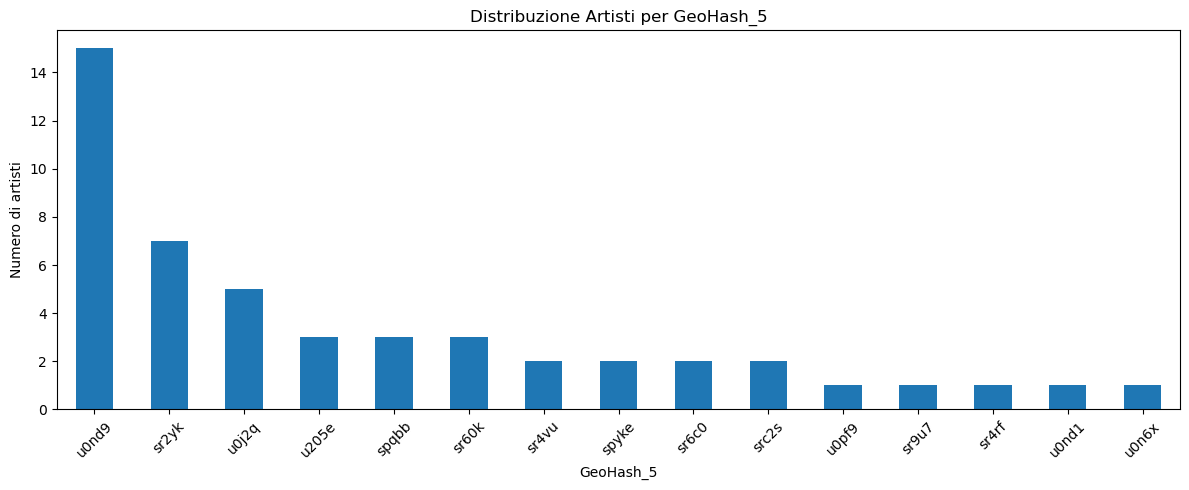

In [44]:
import matplotlib.pyplot as plt

conteggio_geohash = artists_geo["geohash_5"].value_counts().head(15)

plt.figure(figsize=(12,5))
conteggio_geohash.plot(kind="bar")
plt.title("Distribuzione Artisti per GeoHash_5")
plt.xlabel("GeoHash_5")
plt.ylabel("Numero di artisti")
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


ASSIGNMENT 3 